## hw9

#### q7 (a): plot `mini-data.txt`

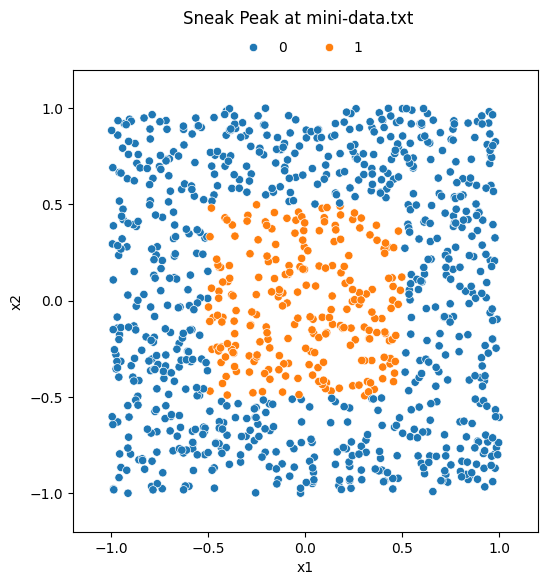

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from mini-data.txt and data2.txt
data = np.loadtxt('mini-data.txt')

# Initialize x, y from mini-data.txt
x_data = data[:, :2]
y_data = data[:, 2].astype(dtype=int)

## quick look at mini-data.txt
fig, ax = plt.subplots(1,1,figsize=(6,6))
fig.suptitle('Sneak Peak at mini-data.txt')

sns.scatterplot(x=x_data[:,0],y=x_data[:,1],hue=y_data,ax=ax)

x_min, x_max = x_data[:,0].min(), x_data[:,0].max()
y_min, y_max = x_data[:,1].min(), x_data[:,1].max()
x_buffer = (x_max - x_min) * 0.1 
y_buffer = (y_max - y_min) * 0.1

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

legend = ax.legend(bbox_to_anchor=(0.65, 1.09), ncol=2,frameon=False)
plt.savefig("hw9_q7a.png")
#plt.show()

#### q7 (b): fit data using `sklearn.tree.DecisionTreeClassifier`

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2, random_state=42)
def dtc_q7(x_train, x_test, y_train, y_test,n):
    ## init decision tree classifier object
    #dtc = DecisionTreeClassifier(criterion='log_loss',max_leaf_nodes=5,class_weight='balanced',max_depth=5,min_samples_leaf=20,random_state=42)
    dtc = DecisionTreeClassifier(criterion='log_loss',max_depth=n,max_leaf_nodes=n+1,class_weight='balanced',min_samples_leaf=int(len(x_train)*0.015),random_state=42)
    dtc.fit(x_train,y_train)
    print(f"train score(max_depth={n}): {dtc.score(x_train,y_train)}")
    print(f"test score(max_depth={n}): {dtc.score(x_test,y_test)}")

for n in range(1,5):
    dtc_q7(x_train, x_test, y_train, y_test,n)

train score(max_depth=1): 0.50375
test score(max_depth=1): 0.49
train score(max_depth=2): 0.75625
test score(max_depth=2): 0.745
train score(max_depth=3): 0.87875
test score(max_depth=3): 0.895
train score(max_depth=4): 1.0
test score(max_depth=4): 1.0


#### q7 (c): display tree(model from (b)) `sklearn.tree.plot_tree`
- best fit is `max_depth=4`

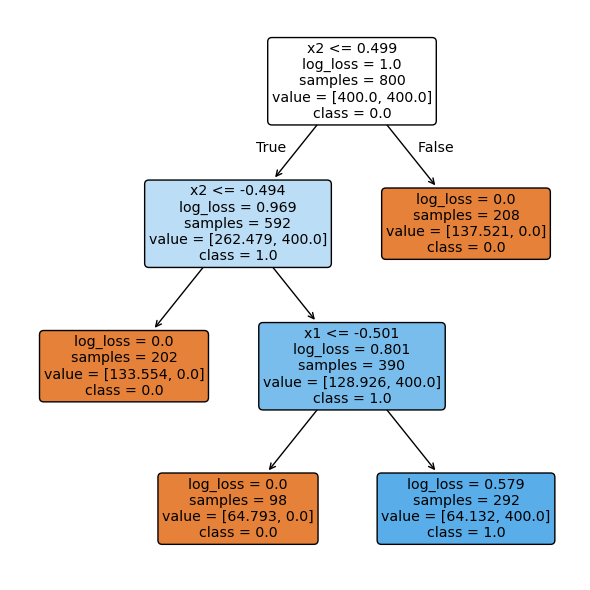

<Figure size 640x480 with 0 Axes>

In [19]:
from sklearn import tree
dtc = DecisionTreeClassifier(criterion='log_loss',max_depth=4,max_leaf_nodes=4,class_weight='balanced',min_samples_leaf=int(len(x_train)*0.015),random_state=42)
dtc.fit(x_train,y_train)
fig = plt.figure(figsize=(6,6))
tree.plot_tree(dtc, feature_names=["x1", "x2"], class_names=["0.0","1.0"],filled=True, rounded=True)
plt.tight_layout()
plt.show()
plt.savefig("hw9_q7c.png")

#### q7 (d): fit data using `sklearn.ensemble.AdaBoostClassifier` then show each of the stumps from the model
*note use small number of stumps 3-5*

#### q7 (e): create table from `sklearn.ensemble.AdaBoostClassifier` model stumps
- column headers: n stumps, training data accuracy

/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy for 1 stumps: 0.501
1
[0.499]
Accuracy for 2 stumps: 0.754
1
[0.246]


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy for 3 stumps: 0.882
1
[0.118]


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy for 4 stumps: 1.0
1
[0.]


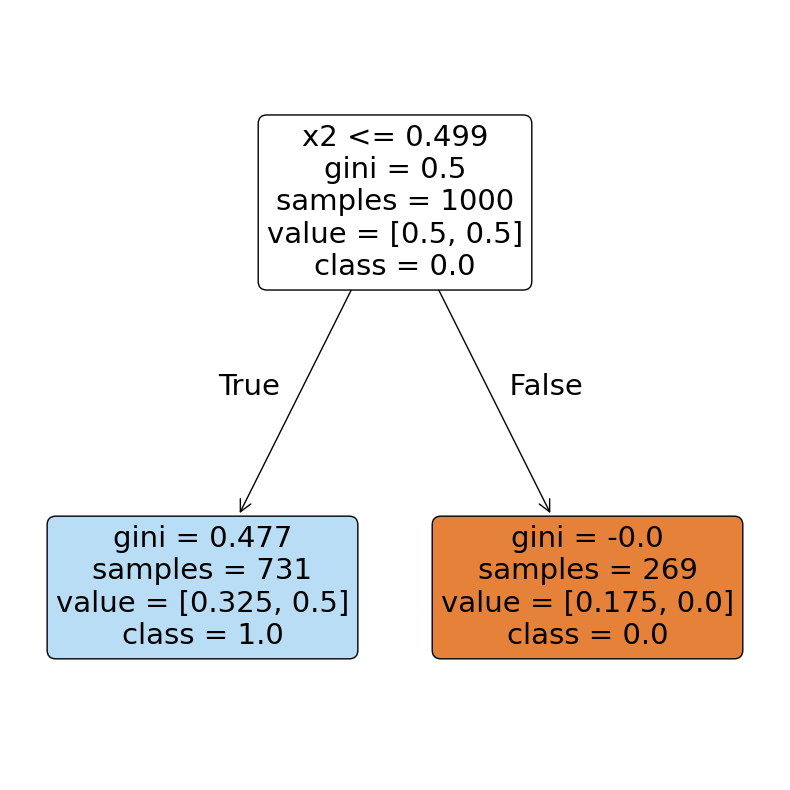

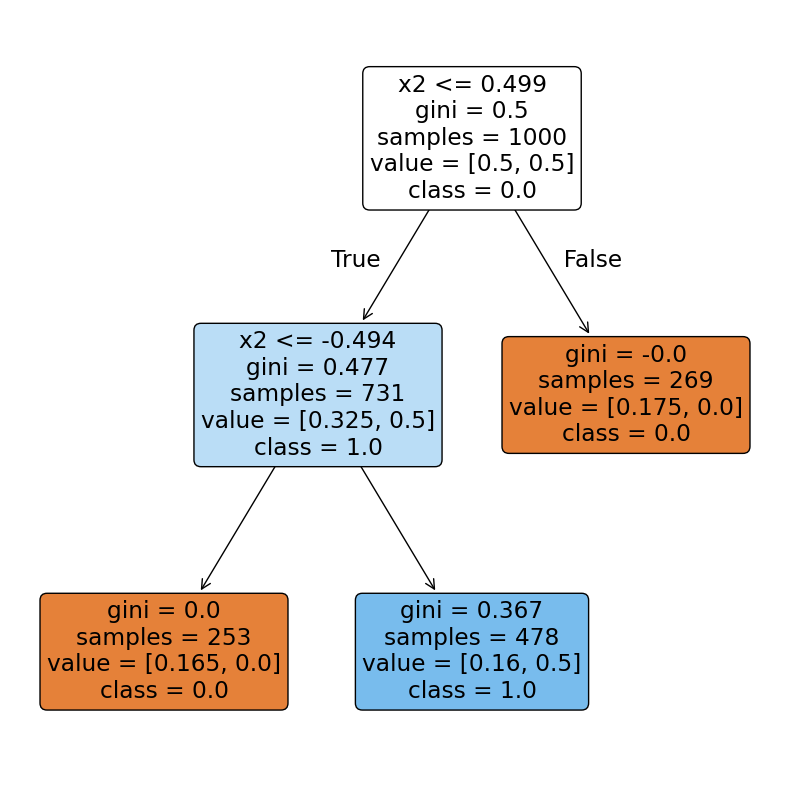

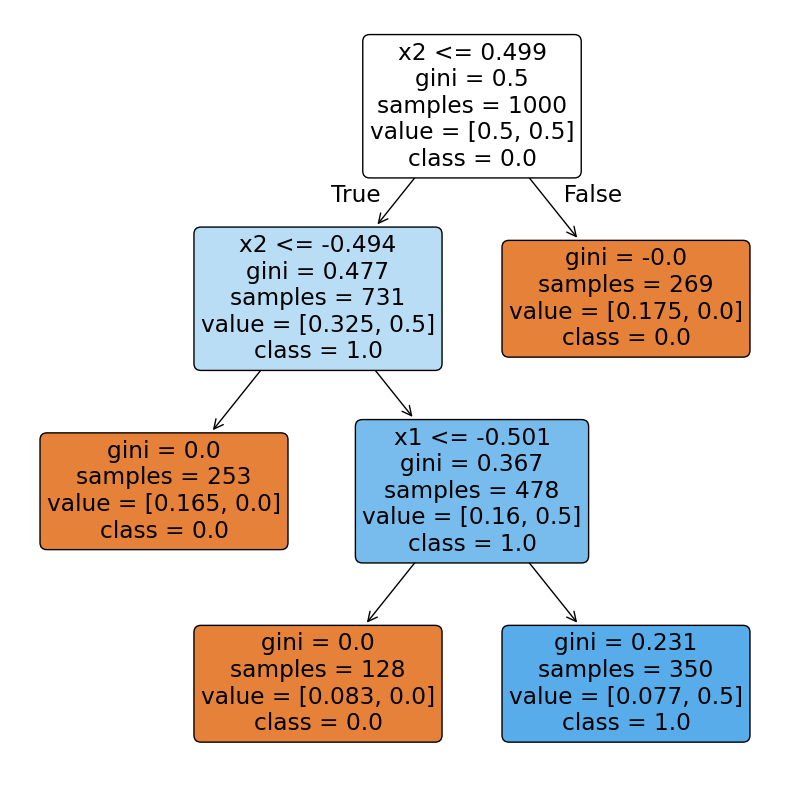

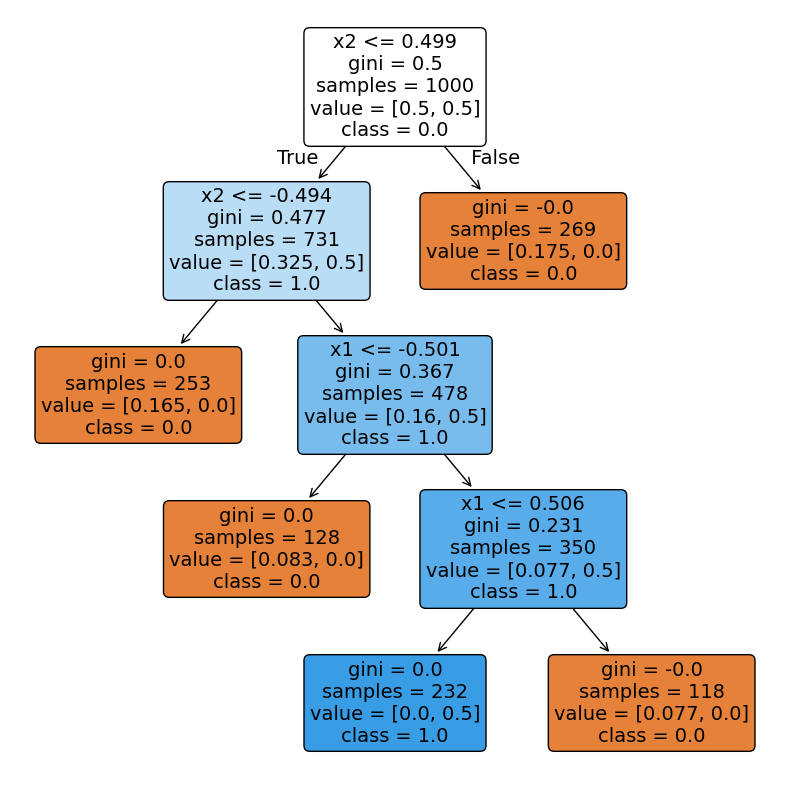

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

def test_n_stumps(n):
    ## initalize the first decision tree stump for the ada booster
    stump = DecisionTreeClassifier(max_depth=n,class_weight='balanced',random_state=42)

    ## initalize ada booster model with n stumps
    ada = AdaBoostClassifier(estimator=stump,n_estimators=1,learning_rate=1.0,algorithm='SAMME',random_state=42)

    ada.fit(x_data,y_data)

    y_pred = ada.predict(x_data)

    print(f"Accuracy for {n} stumps: {accuracy_score(y_data,y_pred)}")
    print(len(ada.estimators_))
    print(ada.estimator_errors_)
    fig = plt.figure(figsize=(8,8))
    tree.plot_tree(ada.estimators_[0], feature_names=["x1", "x2"], class_names=["0.0","1.0"],filled=True, rounded=True)
    plt.tight_layout()
    plt.savefig(f"hw9_q7d_ada_stumps_{n}.png")
    #plt.show()

stumps = [1,2,3,4]
for n in stumps:
    test_n_stumps(n)



#### q8 (a): how many are fraud(class:1) and how many are legit(class:0) in `creditcard.csv`
- legit(class:0): 284315
    - ```cat creditcard.csv | rev | cut -d ',' -f 1 | rev | grep 0 | wc -l```
- fraud(class:1): 492
    - ```cat creditcard.csv | rev | cut -d ',' -f 1 | rev | grep 1 | wc -l```
- note: learning a classifier would be problematic because of the class imbalance. the fraud class only represents $\approx$ 0.17 % of the population in `creditcard.csv`

In [92]:
import pandas as pd

cc = pd.read_csv('creditcard.csv')
print(cc.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

#### q8 (b) balance dataset 

In [93]:
from sklearn.model_selection import train_test_split

## split data by class, balance to 50/50, and combine into one dataframe
fraud = cc[cc['Class']==1.0]
legit = cc[cc['Class']==0.0].sample(n=len(fraud),random_state=42)
cc_bal = pd.concat([fraud,legit]).sample(frac=1, random_state=42)

## split balanced dataframe to x,y , convert to numpy arrays and then training and test data sets
x = cc_bal.drop(columns=['Class'],inplace=False).to_numpy()
y = cc_bal['Class'].astype(int).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#### q8 (c): fit classifier to data, for each classifier use cross-validation to estimate the confusion matrix and display confusion matrix. use the following classifiers:
- decision tree
- boosted decision stumps
- random forest

accuracy of decision tree: 0.929


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.p

accuracy of ada boost: 0.970
accuracy of random forest: 0.939


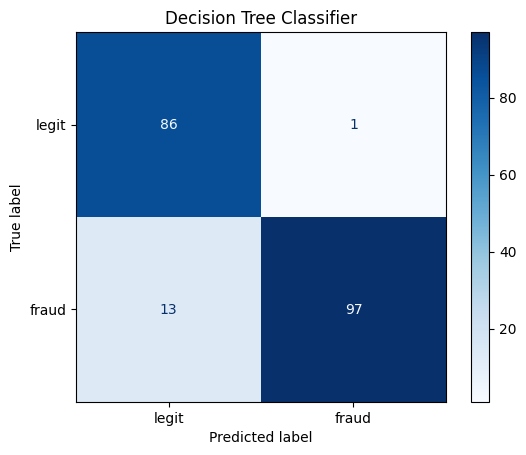

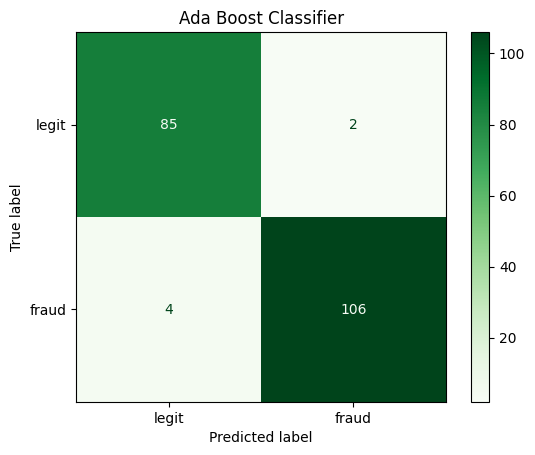

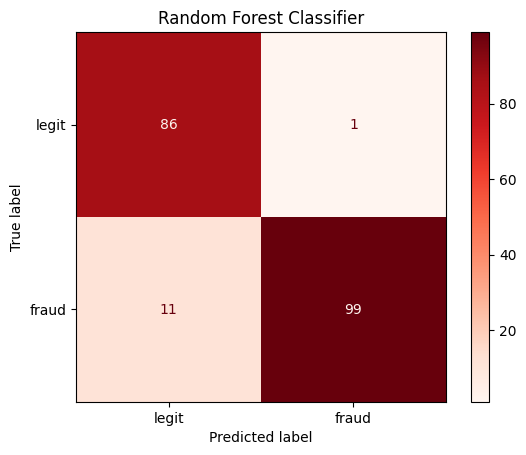

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def fit_dt(x_train, x_test, y_train, y_test ):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', min_samples_leaf=20, random_state=42)
    dt.fit(x_train,y_train)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(dt, x_test, y_test, cv=cv)
    cm = confusion_matrix(y_test,y_pred,labels=[0,1])
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["legit","fraud"])
    cmd.plot(cmap="Blues")
    cmd.ax_.set_title("Decision Tree Classifier")
    plt.savefig("dt_classifier.png")
    score = accuracy_score(y_test,y_pred)
    print(f"accuracy of decision tree: {score:.3f}")

def fit_ada(x_train, x_test, y_train, y_test):
    stump = DecisionTreeClassifier(criterion='gini', max_depth=1, class_weight='balanced',random_state=42,min_samples_leaf=20)
    ada = AdaBoostClassifier(estimator=stump, n_estimators=50, algorithm='SAMME')
    ada.fit(x_train,y_train)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(ada,x_test,y_test,cv=cv)
    cm = confusion_matrix(y_test,y_pred,labels=[0,1])
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["legit","fraud"])
    cmd.plot(cmap="Greens")
    cmd.ax_.set_title("Ada Boost Classifier")
    plt.savefig("boost_classifier.png")
    score = accuracy_score(y_test,y_pred)
    print(f"accuracy of ada boost: {score:.3f}")


def fit_rf(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, criterion='gini',class_weight='balanced',random_state=42)
    rf.fit(x_train,y_train)
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    y_pred =cross_val_predict(rf,x_test,y_test,cv=cv)
    cm = confusion_matrix(y_test,y_pred,labels=[0,1])
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["legit","fraud"])
    cmd.plot(cmap="Reds")
    cmd.ax_.set_title("Random Forest Classifier")
    plt.savefig("rf_classifier.png")
    score = accuracy_score(y_test,y_pred)
    print(f"accuracy of random forest: {score:.3f}")


fit_dt(x_train, x_test, y_train, y_test)
fit_ada(x_train, x_test, y_train, y_test)
fit_rf(x_train, x_test, y_train, y_test)


# Step-by-Step Solution: Credit Card Fraud Detection Analysis (Question 8)

This document outlines the solution to Question 8, focusing on analyzing a credit card fraud dataset, handling class imbalance, and evaluating various classifiers.

## 0. Prerequisites

*   **Dataset:** Download `creditcard.csv` from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).
*   **Libraries:** Ensure you have Python installed with `pandas`, `numpy`, `scikit-learn`, `matplotlib`, and `seaborn`.

## 1. Part (a): Understanding Class Imbalance

**Task:** How many of the transactions are fraudulent? Why might this be problematic when learning a classifier?

**Approach:**
1.  Load the dataset using `pandas`.
2.  Count the occurrences of each class in the 'Class' column (0 for legitimate, 1 for fraudulent).
3.  Discuss the implications of the observed class distribution.

**Code Snippet (Conceptual from Python script):**
```python
# df is the loaded DataFrame
class_counts = df['Class'].value_counts()
fraudulent_count = class_counts.get(1, 0)
legitimate_count = class_counts.get(0, 0)
total_count = len(df)

print(f"Fraudulent transactions: {fraudulent_count} ({fraudulent_count/total_count*100:.2f}%)")
print(f"Legitimate transactions: {legitimate_count} ({legitimate_count/total_count*100:.2f}%)")
```

**Why Class Imbalance is Problematic:**
The credit card fraud dataset is highly imbalanced, with fraudulent transactions being a very small minority. This poses several challenges:
*   **Bias Towards Majority Class:** Standard machine learning algorithms aim to minimize overall error. With imbalanced data, a model can achieve high accuracy by simply always predicting the majority class (legitimate transactions). This makes the model useless for detecting fraud.
*   **Poor Minority Class Performance:** The model might learn the characteristics of the majority class very well but fail to capture the patterns specific to the minority class (fraud). This results in low recall for fraudulent transactions.
*   **Misleading Evaluation Metrics:** Accuracy becomes a deceptive metric. A model predicting "legitimate" for all transactions might have >99% accuracy but 0% fraud detection rate. More suitable metrics include:
    *   **Precision:** Of all transactions predicted as fraud, how many actually were? (TP / (TP + FP))
    *   **Recall (Sensitivity):** Of all actual fraudulent transactions, how many did the model correctly identify? (TP / (TP + FN)) - This is often critical for fraud detection.
    *   **F1-Score:** The harmonic mean of precision and recall.
    *   **Area Under the Precision-Recall Curve (AUC-PR):** A good summary metric for imbalanced datasets.
    *   **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect classifications for each class.

## 2. Part (b): Downsampling for Balance

**Task:** Downsample the legitimate transactions to make the data set more balanced. For instance, you might try to make sure that each class (legitimate or fraudulent) makes up at least 25% of the data set.

**Approach:**
1.  Separate the dataset into majority (Class 0 - legitimate) and minority (Class 1 - fraudulent) samples.
2.  Determine the target number of majority samples for the downsampled dataset. If the minority class (fraud) has $N_1$ samples, and we want it to be at least 25% of the new dataset, the majority class (legitimate) should have at most $3 \times N_1$ samples.
    *   Let $N_{0,new}$ be the new number of legitimate samples.
    *   We want $N_1 / (N_1 + N_{0,new}) \ge 0.25$.
    *   This implies $4N_1 \ge N_1 + N_{0,new}$, so $3N_1 \ge N_{0,new}$.
3.  Randomly select $N_{0,new} = \min(\text{current } N_0, 3N_1)$ samples from the legitimate transactions without replacement.
4.  Combine these downsampled legitimate transactions with all the original fraudulent transactions to create the new, more balanced dataset.

**Code Snippet (Conceptual from Python script):**
```python
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]
minority_count = len(df_minority)

# Target N_majority_new <= minority_count * 3
n_majority_new = int(minority_count * (1 / 0.25 - 1)) # 0.25 is MINORITY_CLASS_MIN_PERCENTAGE
n_majority_new = min(n_majority_new, len(df_majority))

df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=n_majority_new,
                                   random_state=RANDOM_STATE)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
```
This strategy ensures that the fraudulent class will constitute at least 25% of the new dataset, making it more balanced for training classifiers.

## 3. Part (c): Fitting and Evaluating Classifiers

**Task:** Fit three kinds of classifier (Decision Tree, Boosted Decision Stumps, Random Forest) to the *downsampled* data. Use cross-validation to estimate the confusion matrix.

**Overall Approach for Part (c):**
1.  **Preprocessing:**
    *   The 'Time' column is often dropped as its raw value might not be directly useful without complex feature engineering (e.g., converting to cyclical features like hour of day).
    *   The 'Amount' column has a wide range and should be scaled (e.g., using `StandardScaler`) to prevent features with larger magnitudes from dominating distance-based or gradient-based algorithms. The V1-V28 features are PCA components and are typically already scaled.
2.  **Classifier Setup:** Define the three classifiers with chosen hyperparameters.
3.  **Cross-Validation:** Use `sklearn.model_selection.cross_val_predict` with `StratifiedKFold` (e.g., 5 folds). This method provides predictions for each data point when it was in the test set of a fold, giving an out-of-sample prediction set.
4.  **Confusion Matrix:** For each classifier, use the true labels and the cross-validated predictions to compute the confusion matrix using `sklearn.metrics.confusion_matrix`.
5.  **Display:** Visualize the confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

### 3.1 Preprocessing

**Code Snippet (Conceptual from Python script):**
```python
# df_downsampled is the output from Part (b)
df_processed = df_downsampled.copy()
if 'Time' in df_processed.columns:
    df_processed = df_processed.drop('Time', axis=1)
scaler = StandardScaler()
if 'Amount' in df_processed.columns:
    df_processed['Amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))

X = df_processed.drop('Class', axis=1)
y = df_processed['Class']
```

### 3.2 Classifier Training and Evaluation Loop

**General Loop Structure:**
```python
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define classifiers (see specific hyperparameters below)
classifiers = { ... } 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for name, clf in classifiers.items():
    y_pred_cv = cross_val_predict(clf, X, y, cv=cv_strategy)
    cm = confusion_matrix(y, y_pred_cv)
    
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Assuming 0: Legit, 1: Fraud
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name} (Cross-Validated)")
    plt.show()
    
    # Further interpretation (TP, FP, FN, TN, Precision, Recall)
    # ...
```

### 3.3 Specific Classifiers and Hyperparameters

**Rationale for Hyperparameter Choices:**
The chosen hyperparameters are starting points. For a real-world application, hyperparameter tuning (e.g., using `GridSearchCV` or `RandomizedSearchCV`) would be essential. `random_state` is set for reproducibility.

1.  **Decision Tree**
    *   **Classifier:** `sklearn.tree.DecisionTreeClassifier`
    *   **Hyperparameters (Example):**
        *   `max_depth=5`: Limits the depth of the tree to prevent overfitting on this smaller, downsampled dataset. A deeper tree might capture too much noise.
        *   `random_state=RANDOM_STATE`
    *   **Focus:** Decision trees are interpretable and can capture non-linear relationships.

2.  **Boosted Decision Stumps (AdaBoost)**
    *   **Classifier:** `sklearn.ensemble.AdaBoostClassifier`
    *   **Hyperparameters (Example):**
        *   `estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE)`: This makes the base learners decision stumps (trees with only one split).
        *   `n_estimators=50`: The number of stumps to build. 50 is a moderate starting point.
        *   `learning_rate=1.0`: Default. Controls the contribution of each stump.
        *   `random_state=RANDOM_STATE`
    *   **Focus:** AdaBoost focuses on misclassified samples from previous iterations, building a strong classifier from weak learners.

3.  **Random Forest**
    *   **Classifier:** `sklearn.ensemble.RandomForestClassifier`
    *   **Hyperparameters (Example):**
        *   `n_estimators=100`: Number of trees in the forest. 100 is a common default.
        *   `max_depth=10`: Limits the depth of individual trees. Random Forests can handle deeper trees better than single decision trees due to averaging, but some restriction can still help with generalization on smaller datasets.
        *   `random_state=RANDOM_STATE`
        *   `n_jobs=-1`: Uses all available CPU cores for training, speeding up the process.
    *   **Focus:** Random Forests reduce variance by building multiple trees on different subsets of data and features, then averaging their predictions (or taking a majority vote).

### 3.4 Interpreting the Confusion Matrix

A confusion matrix for a binary classification problem (Legitimate vs. Fraudulent) looks like this:

|                   | Predicted Legitimate (0) | Predicted Fraudulent (1) |
| :---------------- | :----------------------- | :------------------------- |
| **Actual Legitimate (0)** | True Negatives (TN)      | False Positives (FP)     |
| **Actual Fraudulent (1)** | False Negatives (FN)     | True Positives (TP)      |

*   **True Negatives (TN):** Legitimate transactions correctly classified as legitimate.
*   **False Positives (FP):** Legitimate transactions incorrectly classified as fraudulent (Type I Error). This can cause inconvenience to legitimate customers.
*   **False Negatives (FN):** Fraudulent transactions incorrectly classified as legitimate (Type II Error). This is often the most critical error in fraud detection, as it means fraud goes undetected.
*   **True Positives (TP):** Fraudulent transactions correctly classified as fraudulent.

**Key Metrics from the Confusion Matrix for Fraud Detection:**
*   **Recall (Sensitivity) for Fraud = TP / (TP + FN):** Ability to find all actual fraudulent transactions. High recall is crucial.
*   **Precision for Fraud = TP / (TP + FP):** Accuracy of positive predictions; when the model predicts fraud, how often is it correct?
*   **Specificity for Legitimate = TN / (TN + FP):** Ability to find all actual legitimate transactions.

The goal is typically to maximize True Positives (detecting fraud) while minimizing False Negatives (missing fraud). There's often a trade-off with False Positives (flagging legitimate transactions as fraud).

## 4. Conclusion

This exercise demonstrates a pipeline for handling a common real-world problem: classification with imbalanced data. Key steps include understanding the data imbalance, applying a resampling technique (downsampling), preprocessing features, and then training and evaluating multiple types of classifiers using robust methods like cross-validation and detailed metrics like the confusion matrix. The choice of the "best" model would depend on the specific business requirements, particularly the relative costs of false negatives versus false positives.
depend on the specific business requirements, particularly the relative costs of false negatives versus false positives.
